# Imporitng Libraries

In [2]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 957.2/957.2 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 kB 957.9 kB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Importing Dataset
df=pd.read_csv("dataset - Fish.csv")

In [ ]:
#viewing first 5 rows
df.head()

,Species Type,Length1,Length2,Length3,Height,Width,Weight
0,1,23.2,25.4,30.0,11.5200,4.0200,242.0
1,1,24.0,26.3,31.2,12.4800,4.3056,290.0
2,1,23.9,26.5,31.1,12.3778,4.6961,340.0
3,1,26.3,29.0,33.5,12.7300,4.4555,363.0
4,1,26.5,29.0,34.0,12.4440,5.1340,430.0


In [ ]:
#Checking the correlation with target variable
df.corr().sort_values

<bound method DataFrame.sort_values of               Species Type   Length1   Length2   Length3    Height     Width  \
Species Type      1.000000 -0.112722 -0.129211 -0.223358 -0.689374 -0.299717   
Length1          -0.112722  1.000000  0.999517  0.992031  0.625378  0.867050   
Length2          -0.129211  0.999517  1.000000  0.994103  0.640441  0.873547   
Length3          -0.223358  0.992031  0.994103  1.000000  0.703409  0.878520   
Height           -0.689374  0.625378  0.640441  0.703409  1.000000  0.792881   
Width            -0.299717  0.867050  0.873547  0.878520  0.792881  1.000000   
Weight           -0.173405  0.915712  0.918618  0.923044  0.724345  0.886507   

                Weight  
Species Type -0.173405  
Length1       0.915712  
Length2       0.918618  
Length3       0.923044  
Height        0.724345  
Width         0.886507  
Weight        1.000000  >

In [ ]:
#Getting information about these data and checking datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species Type  159 non-null    int64  
 1   Length1       159 non-null    float64
 2   Length2       159 non-null    float64
 3   Length3       159 non-null    float64
 4   Height        159 non-null    float64
 5   Width         159 non-null    float64
 6   Weight        159 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.8 KB


In [ ]:
#Checking Null Values in each columns
df.isna().sum()

Species Type    0
Length1         0
Length2         0
Length3         0
Height          0
Width           0
Weight          0
dtype: int64

In [ ]:
df.shape

(159, 7)

# **EDA**

# Detecting Ouliers

<AxesSubplot:>

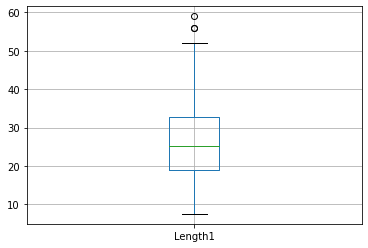

In [ ]:
df.boxplot(column='Length1')

<AxesSubplot:>

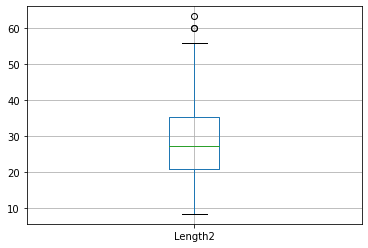

In [ ]:
df.boxplot(column='Length2')

<AxesSubplot:>

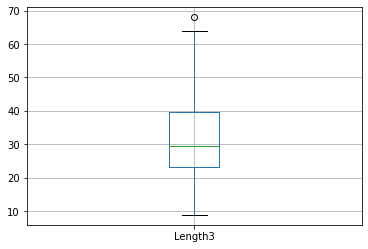

In [ ]:
df.boxplot(column='Length3')

<AxesSubplot:>

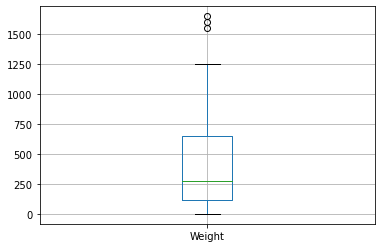

In [ ]:
df.boxplot(column='Weight')

# Implementing Linear regressions model Taking features X and Y as target variables

In [ ]:
X=df['Length3']
y=df['Weight']

# Splitting Dataset as Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=0)

# Changing array from 1D to 2D

In [ ]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

# Importing Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

# Getting Value of m

In [ ]:
print(reg.coef_)

[26.57631875]


# Getting Value of c

In [ ]:
print(reg.intercept_)

-414.8965337105259


# Predicting Value of X_test

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
print(y_pred)

[ 515.27462261  191.04353384  249.51143509  257.48433072  555.13910074
  714.59701325  637.52568887  642.84095262  804.95649701  183.07063821
  509.95935886  794.32596951  741.173332    807.61412888   47.53141257
  148.52142383  230.90801196 1285.98786642  191.04353384  664.10200762
   23.6127257   515.27462261  209.64695696 1392.29314143  111.31457758
  517.93225448  661.44437575  363.78960572  709.2817495   -95.98070869
  613.60700199  209.64695696 1285.98786642  616.26463387  602.97647449
  262.79959447  385.05066072  640.18332074  602.97647449  209.64695696
  488.69830386   10.32456632  262.79959447  688.0206945   -10.93648868
  302.66407259  326.58275947  329.24039135  610.94937012  424.91513885
  757.11912325  -24.22464806  -48.14333493  411.62697948  137.89089633
  241.53853946  355.8167101   547.16620511  -80.03491744  661.44437575
  -64.08912618 -106.61123619  201.67406134  228.25038009  236.22327571
 -127.87229119 1171.70969578  794.32596951  714.59701325  297.34880884
  281.

# Visualizations through scatterplot of X and Y

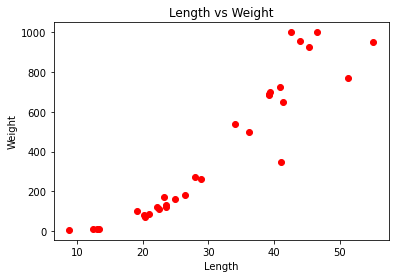

In [ ]:
plt.scatter(X_train,y_train,color='red')
plt.title("Length vs Weight")
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

# Visualization of model best fit line of Length and Weight

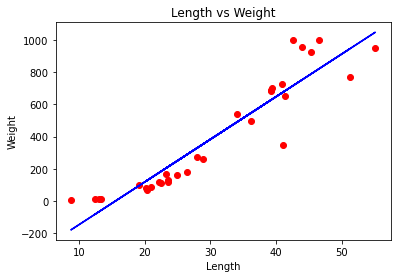

In [ ]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title("Length vs Weight")
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

# Getting Accuracy of Model

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8392117383872504

# Counting Number of Species using countplot

<AxesSubplot:xlabel='Species Type', ylabel='count'>

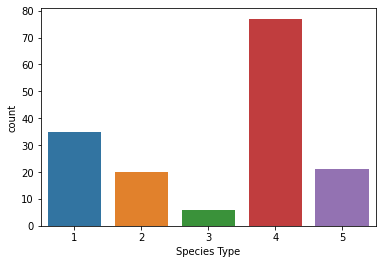

In [ ]:
sns.countplot(x='Species Type',data=df)

# Correlation using visualizations

<AxesSubplot:title={'center':'Correlation Matrix'}>

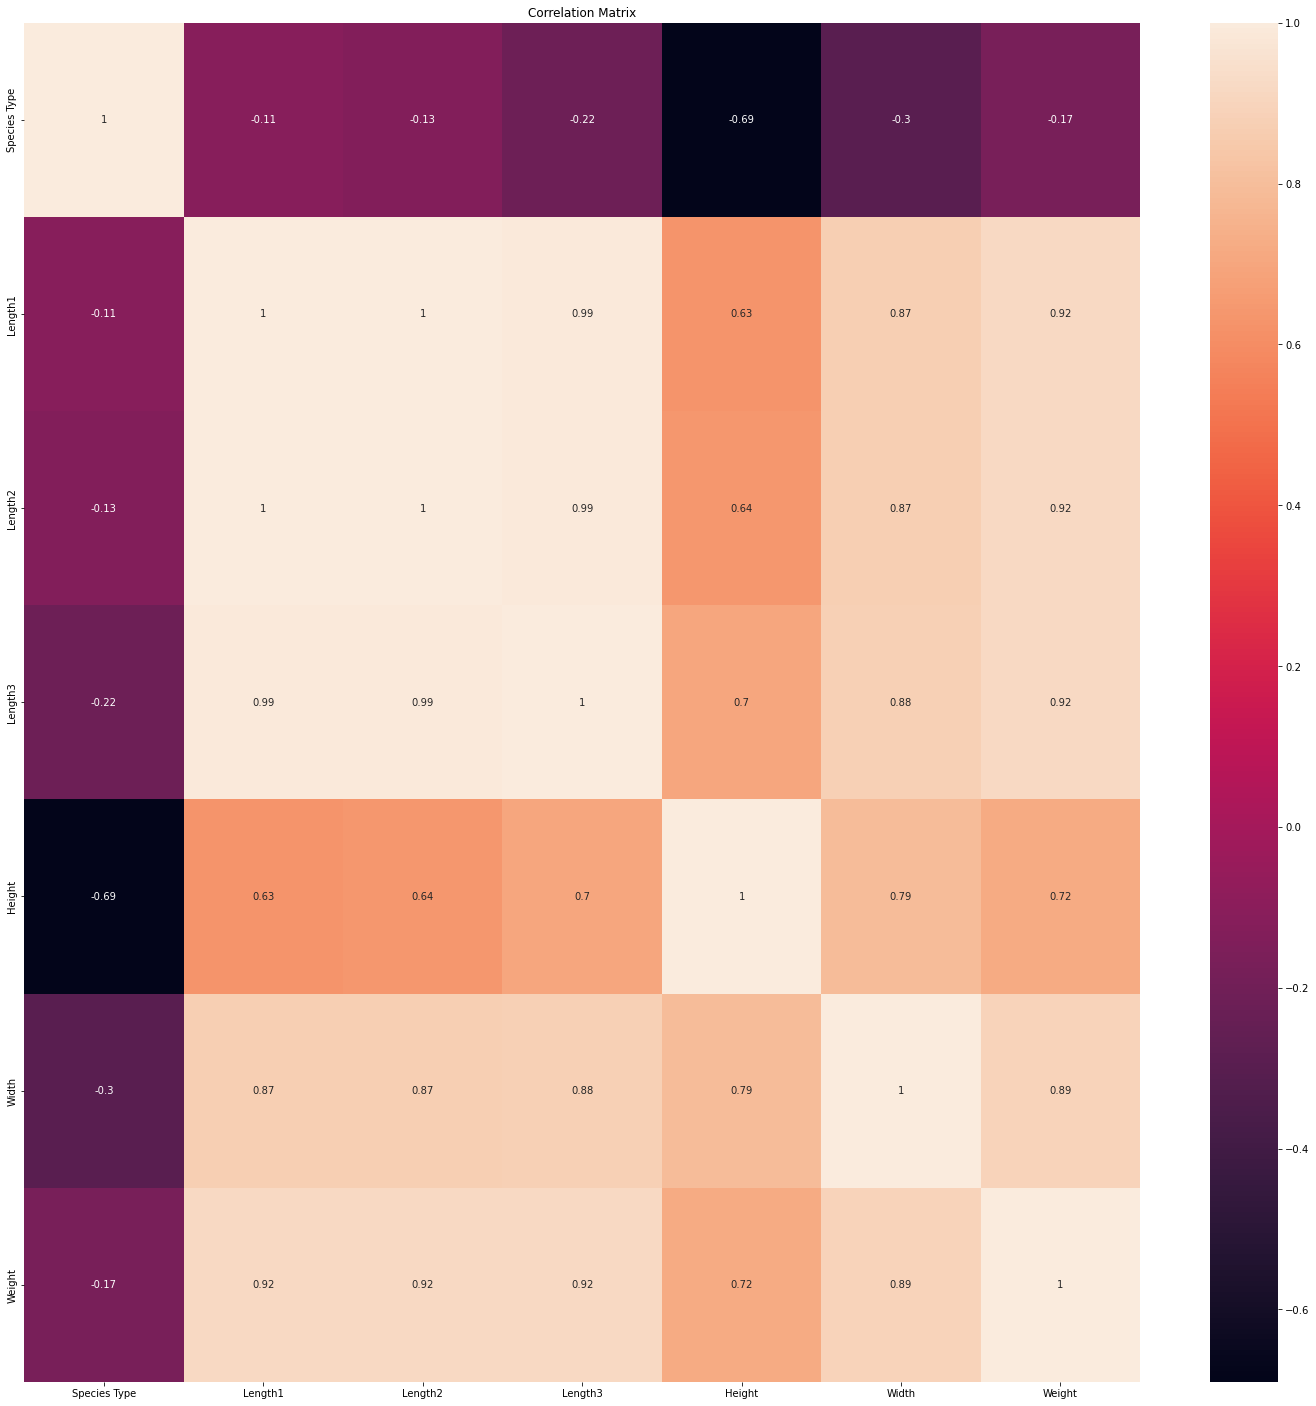

In [ ]:
plt.figure(figsize=(25,25))
plt.title("Correlation Matrix")
colormap=sns.color_palette('viridis',as_cmap=True)
sns.heatmap(round(df.corr(), 2), annot=True)

# Computing R-Squared Value

In [ ]:
from sklearn import metrics

In [ ]:
mean_squared_error=metrics.mean_squared_error(y_test,y_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(X_train,y_train),3))
print('R sqaured testing',round(reg.score(X_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

Sqaured mean error 144.09
R squared training 0.877
R sqaured testing 0.839
intercept -414.8965337105259
coefficient [26.57631875]


# Implementing Multiple Linear Regressions

In [ ]:
df.head()

,Species Type,Length1,Length2,Length3,Height,Width,Weight
0,1,23.2,25.4,30.0,11.5200,4.0200,242.0
1,1,24.0,26.3,31.2,12.4800,4.3056,290.0
2,1,23.9,26.5,31.1,12.3778,4.6961,340.0
3,1,26.3,29.0,33.5,12.7300,4.4555,363.0
4,1,26.5,29.0,34.0,12.4440,5.1340,430.0


In [ ]:
df.corr().sort_values

<bound method DataFrame.sort_values of               Species Type   Length1   Length2   Length3    Height     Width  \
Species Type      1.000000 -0.112722 -0.129211 -0.223358 -0.689374 -0.299717   
Length1          -0.112722  1.000000  0.999517  0.992031  0.625378  0.867050   
Length2          -0.129211  0.999517  1.000000  0.994103  0.640441  0.873547   
Length3          -0.223358  0.992031  0.994103  1.000000  0.703409  0.878520   
Height           -0.689374  0.625378  0.640441  0.703409  1.000000  0.792881   
Width            -0.299717  0.867050  0.873547  0.878520  0.792881  1.000000   
Weight           -0.173405  0.915712  0.918618  0.923044  0.724345  0.886507   

                Weight  
Species Type -0.173405  
Length1       0.915712  
Length2       0.918618  
Length3       0.923044  
Height        0.724345  
Width         0.886507  
Weight        1.000000  >

<AxesSubplot:>

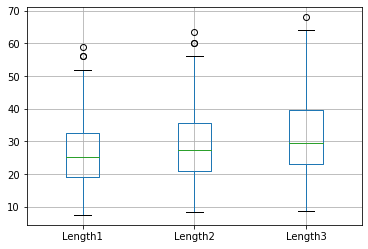

In [ ]:
##We are taking three features for multiple linear regressions i.e Length1,Length2,Length3
#finding the outliers with respect to output variables Length1,Length2,Length3 and Weight
df.boxplot(column=['Length1','Length2','Length3'])

In [ ]:
X=df[['Length1','Length2','Length3']]
y=df[['Weight']]

In [ ]:
print(X)

     Length1  Length2  Length3
0       23.2     25.4     30.0
1       24.0     26.3     31.2
2       23.9     26.5     31.1
3       26.3     29.0     33.5
4       26.5     29.0     34.0
..       ...      ...      ...
154     11.5     12.2     13.4
155     11.7     12.4     13.5
156     12.1     13.0     13.8
157     13.2     14.3     15.2
158     13.8     15.0     16.2

[159 rows x 3 columns]


In [ ]:
print(y)

     Weight
0     242.0
1     290.0
2     340.0
3     363.0
4     430.0
..      ...
154    12.2
155    13.4
156    12.2
157    19.7
158    19.9

[159 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8673671065460835

# Implementing Polynomial Regressions

In [ ]:
df.shape

(159, 7)

In [ ]:
X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

In [ ]:
print(X)

[[23.2    25.4    30.     11.52    4.02  ]
 [24.     26.3    31.2    12.48    4.3056]
 [23.9    26.5    31.1    12.3778  4.6961]
 [26.3    29.     33.5    12.73    4.4555]
 [26.5    29.     34.     12.444   5.134 ]
 [26.8    29.7    34.7    13.6024  4.9274]
 [26.8    29.7    34.5    14.1795  5.2785]
 [27.6    30.     35.     12.67    4.69  ]
 [27.6    30.     35.1    14.0049  4.8438]
 [28.5    30.7    36.2    14.2266  4.9594]
 [28.4    31.     36.2    14.2628  5.1042]
 [28.7    31.     36.2    14.3714  4.8146]
 [29.1    31.5    36.4    13.7592  4.368 ]
 [29.5    32.     37.3    13.9129  5.0728]
 [29.4    32.     37.2    14.9544  5.1708]
 [29.4    32.     37.2    15.438   5.58  ]
 [30.4    33.     38.3    14.8604  5.2854]
 [30.4    33.     38.5    14.938   5.1975]
 [30.9    33.5    38.6    15.633   5.1338]
 [31.     33.5    38.7    14.4738  5.7276]
 [31.3    34.     39.5    15.1285  5.5695]
 [31.4    34.     39.2    15.9936  5.3704]
 [31.5    34.5    39.7    15.5227  5.2801]
 [31.8    3

In [ ]:
print(y)

[ 242.   290.   340.   363.   430.   450.   500.   390.   450.   500.
  475.   500.   500.   340.   600.   600.   700.   700.   610.   650.
  575.   685.   620.   680.   700.   725.   720.   714.   850.  1000.
  920.   955.   925.   975.   950.    40.    69.    78.    87.   120.
    0.   110.   120.   150.   145.   160.   140.   160.   169.   161.
  200.   180.   290.   272.   390.   270.   270.   306.   540.   800.
 1000.    55.    60.    90.   120.   150.   140.   170.   145.   200.
  273.   300.     5.9   32.    40.    51.5   70.   100.    78.    80.
   85.    85.   110.   115.   125.   130.   120.   120.   130.   135.
  110.   130.   150.   145.   150.   170.   225.   145.   188.   180.
  197.   218.   300.   260.   265.   250.   250.   300.   320.   514.
  556.   840.   685.   700.   700.   690.   900.   650.   820.   850.
  900.  1015.   820.  1100.  1000.  1100.  1000.  1000.   200.   300.
  300.   300.   430.   345.   456.   510.   540.   500.   567.   770.
  950.  1250.  1600.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
x=a*x^2+sx+c

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(poly_reg.transform(X_test))
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9731300545653556